In [51]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# The IR-assignment-2-data.txt should be copied into Local Directory, size is too large can't upload to Github
data = pd.read_csv('IR-assignment-2-data.txt', sep=" ", header=None)
rows = len(data.index)
db = {}   #Database for storing docID and Relevance Score

for i in range(0,rows):
    # Storing queries with qid:4 only
    if (data.at[i,1] == "qid:4"):
        db[i] = data.at[i,0]


def savefileMaxDcg(data, db):
    temp =data.drop((data.index[len(db):]))
    np.savetxt('query4max.txt', temp.values, fmt='%s', delimiter=" ")

savefileMaxDcg(data, db)

unsortedDb = db.items()
unsortedDb = list(unsortedDb) #List of tuple conatining docID and relevance pairs

# Sorting the database for getting maxDCG
db = sorted(db.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

In [53]:
def findDCG(data, length):
    ans = 0
    for i in range(1, length):
        temp = (data[i-1][1]/math.log2(i+1))
        ans= ans + temp
    return ans       

In [54]:
# db contains sorted pairs
maxDcgValue = findDCG(db, len(db))
unsortedDcgValue = findDCG(unsortedDb, len(unsortedDb))

maxDcgValue_50 = findDCG(db, 51)
unsortedDcgValue_50 = findDCG(unsortedDb, 51)
#Printing nDCG
print("Max DCG is: {}".format(maxDcgValue))
print("nDCG at 50: {}".format(unsortedDcgValue_50/maxDcgValue_50))
print("nDCG whole Dataset: {}".format(unsortedDcgValue/maxDcgValue)) 

Max DCG is: 19.407247618668023
nDCG at 50: 0.37071213897397365
nDCG whole Dataset: 0.6357153091990775


In [55]:
def getRelevanceandTFpairs(db):
    for i in range(0,rows):
        if (data.at[i,1] == "qid:4"):
            s = float(data.at[i,76][3:])  #Storing the tf-idf value
            temp = (s,data.at[i,0])
            db[i] = (temp)
            
def drawGraph(recall, precision):
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision - Recall Curve')
    plt.show()

def getPrecisionAndRecall(rel_tf_pairs):
    #ranking docs on the basis of the value of feature 45
    sortedByTF = sorted(rel_tf_pairs.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
    totalDocs = 103
    totalRelDocs = 44;
    retrivedRelDocs = 0;
    precision = []
    recall = []

    # Finding Recall and Precision 
    for i in range(0, len(sortedByTF)):
        if (sortedByTF[i][1][1] != 0):
            retrivedRelDocs+=1
        precision.append(retrivedRelDocs/(i+1))
        recall.append(retrivedRelDocs/totalRelDocs)
    drawGraph(recall, precision)


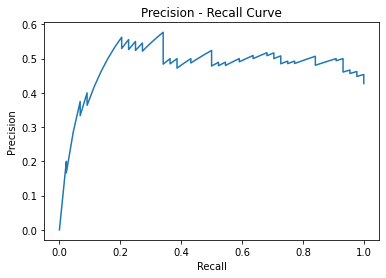

In [56]:
rel_tf_pairs = {}    # Database for storing Relevance and tf-idf pairs
getRelevanceandTFpairs(rel_tf_pairs)
getPrecisionAndRecall(rel_tf_pairs)
